<a href="https://colab.research.google.com/github/HenriqueCCdA/FormacaoAluraML/blob/main/Clustering_basico/notebook/Clustering_B%C3%A1sico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Aula 1

In [2]:
caminho_arquivo = 'https://raw.githubusercontent.com/HenriqueCCdA/FormacaoAluraML/main/Clustering_basico/dados/Wine.csv'

In [3]:
df = pd.read_csv(caminho_arquivo)

In [4]:
print(f'O dado possui {df.shape[0]} amostras e {df.shape[1]} atributos')
df.head()

O dado possui 178 amostras e 14 atributos


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [5]:
df = df.rename(columns = {'Alcohol': 'Alcool',
                          'Ash': 'Po',
                          'Ash_Alcanity': 'Alcalinidade_po',
                          'Magnesium': 'Magnesio',
                          'Color_Intensity': 'Intensidade_de_cor'
                         }
               )
df.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [6]:
df.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [7]:
matriz_corr = df.corr()
matriz_corr

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
Alcool,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
Po,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
Alcalinidade_po,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
Magnesio,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
Intensidade_de_cor,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


In [8]:
!pip install biokit

     |████████████████████████████████| 162 kB 7.3 MB/s 
     |████████████████████████████████| 47 kB 5.3 MB/s 
     |████████████████████████████████| 199 kB 48.2 MB/s 
     |████████████████████████████████| 2.3 MB 39.6 MB/s 
     |████████████████████████████████| 47 kB 5.9 MB/s 
     |████████████████████████████████| 44 kB 3.1 MB/s 
     |████████████████████████████████| 255 kB 61.5 MB/s 
     |████████████████████████████████| 5.8 MB 57.1 MB/s 
     |████████████████████████████████| 251 kB 80.7 MB/s 
     |████████████████████████████████| 127 kB 75.0 MB/s 
  Created wheel for biokit: filename=biokit-0.5.0-py3-none-any.whl size=177149 sha256=c11e6a04bffe4ef650df8d9576ae6af7effb1d8d170db82cdcc70d35e7698e97
  Stored in directory: /root/.cache/pip/wheels/2f/30/fe/0a5e0df22f6ac201067237923fbad60309bb6f7dc68ff6b346
  Created wheel for bioservices: filename=bioservices-1.8.1-py3-none-any.whl size=229863 sha256=9164b0fa27620c717214eb84adcda19cdd16672a2c3c9567d2bc6ed9e6523cd6
  Stored

In [9]:
from biokit.viz import corrplot
import matplotlib.pyplot as plt

Creating directory /root/.config/biokit 
Creating directory /root/.config/bioservices 


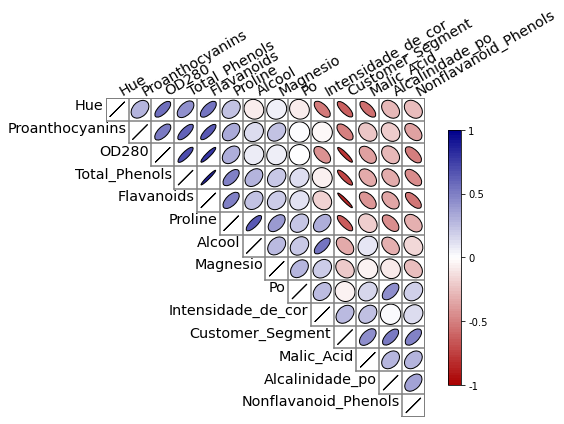

In [10]:
corr_graf = corrplot.Corrplot(matriz_corr)
corr_graf.plot(upper = 'ellipse', fontsize = 'x-large')
fig = plt.gcf()
fig.set_size_inches(13, 8)
fig.show()

In [11]:
df.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [12]:
colunas = df.columns

In [13]:
df_copia = df.copy()
for atributo in colunas:
  df_copia[atributo] = ( df_copia[atributo] - min(df_copia[atributo]) ) / (max(df_copia[atributo]) - min(df_copia[atributo]))

In [14]:
df_copia.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0.0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0.0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0.0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0.0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0.0


In [15]:
df_copia.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.469101
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.387517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,0.500000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
from sklearn import preprocessing

In [49]:
min_max_scaler = preprocessing.MinMaxScaler()
np_df = min_max_scaler.fit_transform(df)
df_normalizado = pd.DataFrame(np_df, columns=df.columns)

In [50]:
df_normalizado.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.469101
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.387517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,0.500000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
np_df = min_max_scaler.inverse_transform(df_normalizado)
df = pd.DataFrame(np_df, columns=df.columns)

In [55]:
df.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


# Aula 2

In [56]:
from sklearn.cluster import KMeans

In [57]:
agrupador = KMeans(n_clusters=4)

In [58]:
agrupador.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [59]:
labels = agrupador.labels_
print(labels)

[1 1 3 3 2 3 3 3 1 1 3 3 3 1 3 3 3 1 3 2 2 2 1 1 2 2 3 3 1 1 3 3 1 3 1 1 1
 1 1 2 2 1 1 2 1 1 1 1 1 3 1 3 3 3 1 1 1 3 3 0 2 0 2 0 0 2 0 0 2 2 1 0 0 1
 1 0 0 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 0 0 1 2 0 2 0 2 0 0 0 2 0 0 0 0 2 0
 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 0 0 2 2 2 2 0 2 2 2 2 0 0 2 2 0 2
 2 0 0 0 0 2 2 2 0 1 2 2 0 2 0 2 2 0 2 2 2 2 0 0 2 2 2 2 2 0]


In [60]:
agrupador.fit(df)
labels = agrupador.labels_
print(labels)

[2 2 0 0 3 0 0 0 2 2 0 0 0 2 0 0 0 2 0 3 3 3 2 2 3 3 0 0 2 2 0 0 2 0 2 2 2
 2 2 3 3 2 2 3 2 2 2 2 2 0 2 0 0 0 2 2 2 0 0 1 3 1 3 1 1 3 1 1 3 3 2 1 1 2
 2 1 1 1 3 1 1 3 3 1 1 1 1 1 3 3 1 1 1 1 1 2 3 1 3 1 3 1 1 1 3 1 1 1 1 3 1
 1 3 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 3 3 1 1 3 3 3 3 1 3 3 3 3 1 1 3 3 1 3
 3 1 1 1 1 3 3 3 1 2 3 3 1 3 1 3 3 1 3 3 3 3 1 1 3 3 3 3 3 1]


In [61]:
fig = go.Figure()
sc = go.Scatter(x = df['Intensidade_de_cor'],
                y = df['Alcool'],
                mode = 'markers',
                marker = dict(color = agrupador.labels_.astype(np.float)),
                text = labels
               )
fig.add_trace(sc)

In [62]:
agrupador = KMeans(n_clusters=3)
agrupador.fit(df)

fig = go.Figure()
sc = go.Scatter(x = df['Intensidade_de_cor'],
                y = df['Alcool'],
                mode = 'markers',
                marker = dict(color = agrupador.labels_.astype(np.float)),
                text = labels
               )
fig.add_trace(sc)

In [63]:
fig = go.Figure()
sc = go.Scatter3d(x = df['Intensidade_de_cor'],
                  y = df['Alcool'],
                  z = df['Proline'],
                  mode = 'markers',
                  marker = dict(color = agrupador.labels_.astype(np.float)),
                  text = labels
                  )
fig.update_layout(
    scene = dict(
        xaxis_title = 'Intensidade de Cor',
        yaxis_title = 'Álcool',
        zaxis_title = 'Proline'
    )
)

fig.add_trace(sc)

In [64]:
centros = pd.DataFrame(agrupador.cluster_centers_)
centros.columns = colunas
centros.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,12.516667,2.494203,2.288551,20.823188,92.347826,2.070725,1.758406,0.390145,1.451884,4.086957,0.941159,2.490725,458.231884,2.275362
1,13.804468,1.883404,2.426170,17.023404,105.510638,2.867234,3.014255,0.285319,1.910426,5.702553,1.078298,3.114043,1195.148936,1.021277
2,12.929839,2.504032,2.408065,19.890323,103.596774,2.111129,1.584032,0.388387,1.503387,5.650323,0.883968,2.365484,728.338710,2.258065


In [65]:
fig.add_trace( go.Scatter3d(x = centros['Intensidade_de_cor'],
                            y = centros['Alcool'],
                            z = centros['Proline'],
                            mode = 'markers',
                            marker = dict(color = 'red'),
                            text = [0, 1, 2]                            
                            )
              )

fig.show()

# Aula 3

In [66]:
from sklearn.cluster import DBSCAN

agrupador = DBSCAN(eps = 1.3, min_samples = 15, metric = "manhattan")
agrupador.fit(df_normalizado)

DBSCAN(algorithm='auto', eps=1.3, leaf_size=30, metric='manhattan',
       metric_params=None, min_samples=15, n_jobs=None, p=None)

In [67]:
agrupador.labels_

array([ 0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
        1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,
        1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  2, -1,  2, -1,  2,
       -1, -1,  2, -1, -1,  2, -1, -1,  2,  2, -1,  2,  2,  2, -1, -1, -1,
        2, -1,  2,  2, -1, -1, -1,  2,  2,  2,  2,  2, -1,  2,  2,  2, -1,
        2,  2,  2,  2,  2,  2,  2,  2])

In [68]:
agrupador = DBSCAN(eps = 0.01, min_samples = 15, metric = "manhattan")
agrupador.fit(df_normalizado)
agrupador.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

In [70]:
agrupador = DBSCAN(eps = 10, min_samples = 15, metric = "manhattan")
agrupador.fit(df_normalizado)
agrupador.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [71]:
agrupador = DBSCAN(eps = 1.5, min_samples = 15, metric = "manhattan")
agrupador.fit(df_normalizado)
agrupador.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  1,  1,  1,  1, -1,  1,
       -1, -1, -1, -1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1, -1,
        1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  2,  2,  2,  2,  2,
        2,  2,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,
        2,  2,  2,  2,  2, -1, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2])

In [37]:
agrupador = DBSCAN(eps = 1.5, min_samples = 30, metric = "manhattan")
agrupador.fit(df_normalizado)
agrupador.labels_

array([ 0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

In [72]:
agrupador = DBSCAN(eps = 1.5, min_samples = 80, metric = "manhattan")
agrupador.fit(df_normalizado)
agrupador.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

In [73]:
agrupador = DBSCAN(eps = 1.5, min_samples = 1, metric = "manhattan")
agrupador.fit(df_normalizado)
agrupador.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        0,  0,  0,  0,  0,  0,  0,  0,  2,  3,  3,  4,  4,  4,  4,  5,  4,
        3,  6,  4,  7,  4,  8,  4,  4,  4,  4,  9,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4, 10, 11,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4, 12,  4, 13,  4,  4, 14,  4,  4, 15,
        4,  4, 16,  4, 17, 18,  4,  4,  4,  4,  4, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 20, 20, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19])

In [74]:
agrupador = DBSCAN(eps = 0.5, min_samples = 15, metric = "euclidean")
agrupador.fit(df_normalizado)
agrupador.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1,  1, -1,  1,  1,  1,
       -1, -1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1, -1, -1,  1,  1,
        1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1,
        1,  1, -1, -1, -1, -1,  1,  1, -1,  1, -1, -1,  2,  2, -1, -1, -1,
       -1, -1,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1, -1, -1,
        2, -1,  2,  2, -1, -1, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2])

# Aula 4

In [75]:
from sklearn.cluster import MeanShift

In [76]:
agrupador = MeanShift()
agrupador.fit(df)
agrupador.labels_

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0])

In [77]:
from sklearn.cluster import estimate_bandwidth

In [79]:
BW = estimate_bandwidth(df, quantile = 0.1)
agrupador = MeanShift(BW)
agrupador.fit(df)
agrupador.labels_

array([ 4,  4,  8,  9,  5,  9,  7,  7,  4,  4,  9,  7,  7,  8,  9,  7,  7,
        8, 10,  6,  5,  5,  4,  4,  6,  6,  8,  7,  6,  4,  7,  9,  4,  7,
        8,  6,  6,  8,  4,  5,  5,  4,  8,  1,  6,  4,  4,  4,  4,  7,  8,
        7,  8,  7,  4,  8,  4,  7,  7,  0,  1,  3,  1,  3,  3,  1,  0,  0,
        5,  5,  6,  3,  3,  4,  6,  3,  3,  0,  5,  3,  3,  1,  1,  0,  0,
        3,  0,  2,  1,  1,  0,  3,  0,  3,  3,  6,  1,  3,  1,  3,  1,  2,
        3,  3,  1,  3,  0,  0,  3,  1,  2,  3,  2,  3,  3,  3,  0,  3,  3,
        2,  1,  3,  3,  3,  3,  3,  3,  3,  3,  2,  1,  0,  2,  2,  1,  1,
        1,  0,  2,  2,  2,  5,  0,  2,  6,  6,  3,  1,  1,  2,  0,  0,  3,
        1,  1,  5,  0,  6,  1,  1,  0,  1,  2,  1,  1,  0,  1,  1,  5,  1,
        0,  3,  1,  5,  5,  6,  6,  2])

# Alura 5

In [81]:
agrupador = KMeans(n_clusters=5)
agrupador.fit(df)
labels = agrupador.labels_
labels

array([2, 2, 2, 1, 4, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 4, 4, 4,
       2, 2, 4, 4, 2, 1, 4, 2, 1, 1, 2, 1, 2, 4, 4, 2, 2, 4, 4, 2, 2, 3,
       4, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 0, 3, 0, 3, 0, 0, 3,
       0, 0, 4, 3, 4, 0, 0, 2, 4, 0, 0, 0, 4, 0, 0, 3, 3, 0, 0, 0, 0, 3,
       3, 3, 0, 0, 0, 0, 0, 4, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 0, 0, 3,
       3, 0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0,
       3, 3, 3, 3, 3, 0, 3, 3, 3, 4, 0, 3, 4, 4, 0, 3, 3, 3, 0, 0, 0, 3,
       3, 3, 0, 4, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 4, 3, 0, 0, 3, 4, 4, 4,
       4, 3], dtype=int32)

In [84]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x = df['Intensidade_de_cor'],
                           y = df['Alcool'],
                           z = df['Proline'],
                           mode = 'markers',
                           marker = dict(color = labels.astype(np.float)),
                           text = labels))
fig.show()

In [85]:
from sklearn.metrics import silhouette_score

In [87]:
faixa_n_clusters = [i for i in range(2, 10)]
print(faixa_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9]


In [94]:
valores_silhueta = []
for k in faixa_n_clusters:
  agrupador = KMeans(n_clusters=k)
  labels = agrupador.fit_predict(df)
  media_silheta = silhouette_score(df, labels)
  valores_silhueta.append(media_silheta)

In [95]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = faixa_n_clusters,
                         y = valores_silhueta))

fig.update_layout(
    title = "Valores de Silhueta Medios",
    xaxis_title = "Número de Clusteres",
    yaxis_title = "Valor médio de silhueta"
)

fig.show()

In [104]:
faixa_quantil = np.linspace(0.02, 0.5, 30)
faixa_quantil

array([0.02      , 0.03655172, 0.05310345, 0.06965517, 0.0862069 ,
       0.10275862, 0.11931034, 0.13586207, 0.15241379, 0.16896552,
       0.18551724, 0.20206897, 0.21862069, 0.23517241, 0.25172414,
       0.26827586, 0.28482759, 0.30137931, 0.31793103, 0.33448276,
       0.35103448, 0.36758621, 0.38413793, 0.40068966, 0.41724138,
       0.4337931 , 0.45034483, 0.46689655, 0.48344828, 0.5       ])

In [105]:
valores_silhueta = []
quantil_plot = []
for quantil in faixa_quantil:
  bandwith = estimate_bandwidth(df, quantile=quantil)
  agrupador = MeanShift(bandwith)
  labels = agrupador.fit_predict(df)
  if len(np.unique(labels)) < len(df)  and len(np.unique(labels)) > 1  :
    media_silheta = silhouette_score(df, labels)
    valores_silhueta.append(media_silheta)
    quantil_plot.append(quantil)

In [106]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = quantil_plot,
                         y = valores_silhueta))

fig.update_layout(
    title = "Valores de Silhueta Medios",
    xaxis_title = "Quantil",
    yaxis_title = "Valor médio de silhueta"
)

fig.show()

In [113]:
agrupador_kmeans = KMeans(n_clusters=3)
agrupador_DBSCAN = DBSCAN(eps=2.1, min_samples = 56, metric = 'manhattan')
agrupador_meanshift = MeanShift(bandwidth=estimate_bandwidth(df, quantile = 0.28))

labels_kmeans = agrupador_kmeans.fit_predict(df_normalizado)
labels_DBSCAN = agrupador_DBSCAN.fit_predict(df_normalizado)
labels_meanshift  = agrupador_meanshift .fit_predict(df)

print("Labels K-means: ", labels_kmeans)
print("Labels BBSCAN: ", labels_DBSCAN)
print("Labels MeanShift: ", labels_meanshift)

Labels K-means:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Labels BBSCAN:  [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1  0  0 -1  0  0  0 -1 -1 -1  0
  0 -1  0  0  0 -1 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0  0 -1
 -1  0  0 -1  0  0  0  0  0 -1  0  0  0  0 -1  0 -1  0  0 -1  0  0 -1  0
  0 -1 -1  0 -1  0  0 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
Labels MeanShift:  [2 2 2 3 0 3 2 2 2 2 3 2 2 2 3 2 2 2 3 1 1 

In [114]:
print("O coeficiente de silheta do K-means é: ", silhouette_score(df, labels_kmeans))
print("O coeficiente de silheta do DBSCAN  é: ", silhouette_score(df, labels_DBSCAN))
print("O coeficiente de silheta do meanshift  é: ", silhouette_score(df, labels_meanshift))

O coeficiente de silheta do K-means é:  0.2089941567196211
O coeficiente de silheta do DBSCAN  é:  0.11812354028715218
O coeficiente de silheta do meanshift  é:  0.5105799249655929
